<a href="https://colab.research.google.com/github/shahdhruv29/Modelling-and-Simulation-Labs/blob/main/code/Lab10_Cellular_Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab-10: Adoption of Products Using Cellular Automata

Here we simulate the Bass model (Lab-3) using Cellular Automata

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation
from math import *
import random
import seaborn as sns

matplotlib.rc('animation', html='html5')

In [ ]:
global NEUTRAL, PRODUCT1, PRODUCT2
NEUTRAL = 0 #Not influenced
PRODUCT1 = 1
PRODUCT2 = 2

In [ ]:
def initBar(m, n, hotSites, coldSites):
#   global AMBIENT
    ambientBar = NEUTRAL * np.ones((m, n))
    bar = applyHotCold(ambientBar, hotSites, coldSites)
    return bar

In [ ]:
def applyHotCold(bar, rightSites, coldSites): #applies influenced to the population
    for k in range(len(rightSites)):
        bar[rightSites[k, 0], rightSites[k, 1]] = PRODUCT1
    for k in range(len(coldSites)):
        bar[coldSites[k, 0], coldSites[k, 1]] = PRODUCT2
    return bar

In [ ]:
def reflectingLat(lat):
    latNS = np.row_stack((lat[0], lat, lat[-1]))
    return np.column_stack((latNS[:,0], latNS, latNS[:,-1]))

In [ ]:
def periodicLat(lat): #This is the function of the boundary conditions.
    latN = np.row_stack((lat[-1], lat))
    latS = np.row_stack((latN, lat[0]))
    latE = np.column_stack((latS[:,-1], latS))
    return np.column_stack((latE, latS[:,0]))

In [ ]:
def applyDiffusionExtended(latExt):
    m = latExt.shape[0] - 2
    n = latExt.shape[1] - 2
    # newLat = latExt[0,m
    newLat = np.zeros((m, n))

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            site = latExt[i, j]
            N = latExt[i - 1, j]
            NE = latExt[i - 1, j + 1]
            E = latExt[i, j + 1]
            SE = latExt[i + 1, j + 1]
            S = latExt[i + 1, j]
            SW = latExt[i + 1, j - 1]
            W = latExt[i, j - 1]
            NW = latExt[i - 1, j - 1]
            newLat[i - 1, j - 1] = interaction(site, N, NE, E, SE, S, SW, W, NW);
    return newLat

In [ ]:
def prob_product(k, p):
  return 1 - (1-p)**k

# def prob_product2(k, q):
#   return 1 - (1-q)**k

In [ ]:
def interaction(site, N, NE, E, SE, S, SW, W, NW):
    peer = np.array([N, NE, E, SE, S, SW, W, NW])
    # peer2 = np.array([N, NE, E, SE, S, SW, W, NW])

    peer1 = np.count_nonzero(peer==1)
    peer2 = np.count_nonzero(peer==2)

    p = 0.12
    q = 0.225

    prob_1 = prob_product(peer1, p)
    prob_2 = prob_product(peer2, q)

    r = np.random.rand()
    if(site==0):

        if(peer1>0 and peer2>0):

            if (prob_1 > prob_2):
                if(r < prob_1):
                    return 1
            elif (prob_1 < prob_2):
                if (r < prob_2):
                    return 2
            else:
                if (r < prob_1):
                    np.choice([1, 2])
                else:
                    return site

        if(peer1>0 and peer2==0):
            if(r<prob_1):
                return 1
        if(peer1==0 and peer2>0):
            if(r<prob_2):
                return 2
        else:
            return site
    # if (site == 0 and peer > 0 and np.random.rand() < prob_product1(peer, p)):
    #   return 1
    else :
      return site

In [ ]:
def  interactionSim(m, n, hotSites, coldSites, t, boundary):
    # Initialize grid
    bar = initBar(m, n, hotSites, coldSites)
    change = np.array([])
    # Perform simulation
    grids = np.zeros((t + 1, m, n))
    grids[0, :, :] = bar
    for i in range(1, t + 1):
        # Extend matrix
        barExtended = boundary(bar)

        # Apply spread of heat function to each grid point
        bar = applyDiffusionExtended(barExtended)
        # reapply hot and cold spots

        # Save new matrix
        grids[i, :, :] = bar
        change = np.append(change, np.sum(grids[i, :, :]) - np.sum(grids[i - 1, :, :]))
    return grids, change

In [ ]:
def animate_simulation(grids, time):
  Writer = animation.writers['ffmpeg']
  writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

  figGray = plt.figure()
  plt.axis('off')
  imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

  # The animation function, called to produce a frame for each generation.
  def updatefig(i, *args):
      global grids
      imGray.set_array(grids[i,:,:])
      return imGray,

  grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids),
                                    interval=50, blit=False)
  plt.show()

  # To save the animation, use the command, placed before HTML:
  grid_ani.save('DiffusionGray.mp4', writer=writer)

  return HTML(grid_ani.to_html5_video())

In [ ]:
def generate_random_matrix(n, p_range, q_range):
    # Generate random integers for each column
    column1 = np.random.randint(0, p_range, size=n)
    column2 = np.random.randint(0, q_range, size=n)

    # Combine columns into a matrix
    result_matrix = np.column_stack((column1, column2))

    return result_matrix

PRODUCT1 - GRAY
PRODUCT2 - WHITE
NETURAL - BLACK

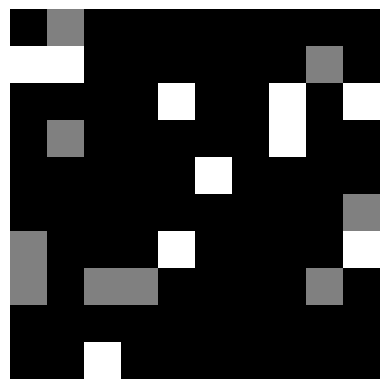

In [ ]:
m = 10
n = 10
t = 50
total_inf = 20
influenced = generate_random_matrix(total_inf, m, n)

influenced1 = influenced[0: floor(total_inf/2), :]
influenced2 = influenced[floor(total_inf/2) :, :]
grids, change = interactionSim(m, n, influenced1, influenced2, t, reflectingLat)

animate_simulation(grids, t)